# Accumulated Local Effects examples
This script serves to demonstrate how the ale AccumulatedLocalEffects can be used.

## Importing the AccumulatedLocalEffects class

In [1]:
from ale import AccumulatedLocalEffects

## Importing the example data sets

In [2]:
import numpy as np

# Training data sets
X_train = np.load('data/EXAMPLE_X_train.npy')
y_train = np.load('data/EXAMPLE_y_train.npy')

# Test data sets
X_test = np.load('data/EXAMPLE_X_test.npy')
y_test = np.load('data/EXAMPLE_y_test.npy')

## Initializing a regressor
Works best for histogram based gradient boosters, because they usually don't take too much time for fitting. The class should work for any regressor, particularly the following three were tested:
* [LightGBM regressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)
* [XGBoost regressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html)
* [sklearn HistGradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)

In [3]:
from lightgbm import LGBMRegressor

# Parameter documentation: https://lightgbm.readthedocs.io/en/latest/Parameters.html
reg = LGBMRegressor(objective='cross_entropy',  # Cost function
                    n_estimators=300,  # Number of trees
                    num_leaves=100,  # Number of leaves (branch endings)
                    seed=1)  # Seed for RNG

## Instance of the AccumulatedLocalEffects class

In [4]:
ALE = AccumulatedLocalEffects(reg=reg,
                              filename='plots/EXAMPLE_LSD',  # Location to store the figures at
                              X_train=X_train,  # Training data set (features)
                              y_train=y_train,  # Training data set (labels)
                              num_illum=4,  # Number of positions used for illumination
                              num_wlen=16)  # Number of wavelengths used for illumination

## Obtaining the feature indices sorted by importance
... by sorting the total variations of the accumulated local effects function for the first illumination position.

In [19]:
ALE.feature_importance_indices(illum_pos=[1])

array([ 5,  1, 14,  4, 13,  9, 12,  6,  8, 11,  7,  3, 10,  2, 15,  0])

... by sorting the sum of total variations of the accumulated local effects function over all illumination positions.

In [20]:
ALE.feature_importance_indices(illum_pos=[0, 1, 2, 3])

array([ 1,  5, 14,  4, 13, 12,  9,  8,  6,  7, 11,  3, 10,  2, 15,  0])

## Plotting the ALE function
... for the features corresponding to the first illumination position, including the 0.1, 0.2, ..., 0.9 quantiles of the empirical distribution functions as x-axis ticks.

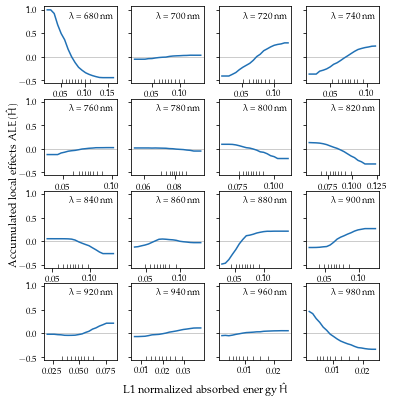

In [21]:
ALE.plot_ALE_function(illum_pos=[1])

... for each feature and illumination position.

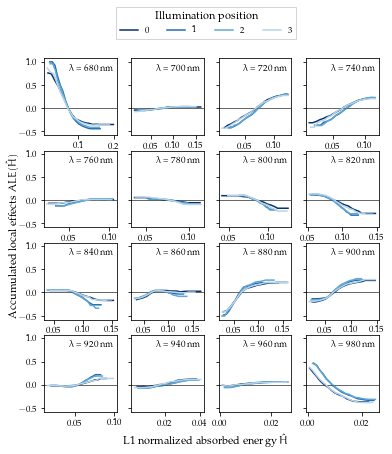

In [22]:
ALE.filename = 'plots/EXAMPLE_MI-LSD'  # Changing filename to avoid overwriting

ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

## Plotting the 'feature clipping' progressions of absolute prediction errors
... with the clipping orders `'state_of_the_art'` (features clipped uniformally), `'min_ALE'` (features clipped according to the feature importances), and `'updated_min_ALE'` (least important feature in every round is removed).

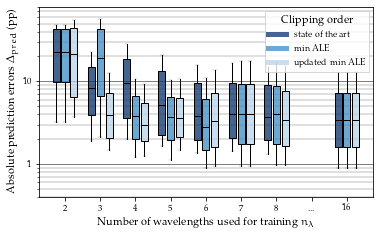

In [13]:
ALE.filename = 'plots/EXAMPLE_LSD'  # Changing filename to avoid overwriting
ALE.X_train = X_train[:, 16:32]  # Swapping the training data set for LSD (only using one illumination position)
ALE.num_illum = 1  # Number of positions used for illumination for LSD

stats = ALE.plot_feature_clipping(X_test[:, 16:32], 
                                  y_test,
                                  illum_pos=[0],
                                  clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                  n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

... and now for MI-LSD, with different clipping orders: `'alternating'` (first remove even, then odd feature indices), `'random'` (random clipping order), and `'custom'` (order is passed via the `ordered_indices` parameter).

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


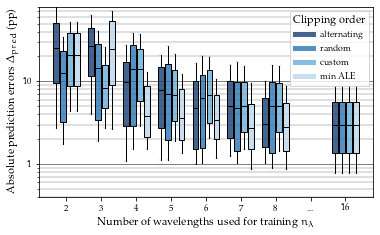

In [5]:
ALE.filename = 'plots/EXAMPLE_MI-LSD'  # Changing filename to avoid overwriting
ALE.X_train = X_train  # Swapping the training data set for MI-LSD (all illumination position)
ALE.num_illum = 4  # Number of positions used for illumination for LSD

stats = ALE.plot_feature_clipping(X_test, 
                                  y_test,
                                  illum_pos=[0, 1, 2, 3],
                                  clipping_order=['alternating', 'random', 'custom', 'min_ALE'],
                                  index_order=[7, 8, 6, 9, 5, 10, 4, 11, 3, 12, 2, 13, 1, 14, 0, 15],  # Custom order
                                  n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])